## Deep Learning
### Examen Agosto 2022

#### Alumna: Ariadna Garmendia

#### 3) Descargar el dataset desde el siguiente link. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

#### Entrenar un modelo de deep learning que no utilice embeddings.
#### Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
#### Compare el score de cada modelo y comente lo necesario.


In [245]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import torch
from torch.utils.data import Dataset, DataLoader


In [246]:
df = pd.read_csv('dataset_2.csv')
df = pd.DataFrame(df)

Análisis Exploratorio de los datos

In [247]:
df.shape

(550068, 12)

In [248]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [249]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [250]:
df.User_ID.value_counts(dropna=False)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [251]:
df.Product_ID.value_counts(dropna=False)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [252]:
df.Gender.value_counts(dropna=False)

M    414259
F    135809
Name: Gender, dtype: int64

In [253]:
df.Age.value_counts(dropna=False)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [254]:
df.Occupation.value_counts(dropna=False)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [255]:
df.City_Category.value_counts(dropna=False)

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [256]:
df.Stay_In_Current_City_Years.value_counts(dropna=False)

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [257]:
df.Marital_Status.value_counts(dropna=False)

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [258]:
df.Product_Category_1.value_counts(dropna=False)

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [259]:
df.Product_Category_2.value_counts(dropna=False)

NaN     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [260]:
df.Product_Category_3.value_counts(dropna=False)

NaN     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

In [261]:
df.Purchase.value_counts(dropna=False)

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

Analizo los Nan

In [262]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Nan values: Hago imputación con la mediana

In [263]:
df.Product_Category_2.fillna(df.Product_Category_2.median(),inplace = True)
df.Product_Category_3.fillna(df.Product_Category_3.median(),inplace = True)

Verifico que no hay mas Nan:

In [264]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Encoding de las variables

In [265]:
# GENDER - BINARY ENCODING
df['Gender_enc'] = df.Gender.apply(lambda label: 0 if label == 'M' else 1)
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_enc
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969,0


In [266]:
age_enc = pd.get_dummies(df["Age"], prefix="Age")
df = pd.concat([df, age_enc], axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_enc,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,1,1,0,0,0,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1,1,0,0,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422,1,1,0,0,0,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057,1,1,0,0,0,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969,0,0,0,0,0,0,0,1


In [267]:
# CITY_CATEGORY
citycat_enc = pd.get_dummies(df["City_Category"], prefix="City_Category")
df = pd.concat([df, citycat_enc], axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,...,1,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,1,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,...,1,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,1,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,...,0,0,0,0,0,0,1,0,0,1


In [268]:
#OCCUPATION

occupation_enc = pd.get_dummies(df["Occupation"], prefix="Occupation")
df = pd.concat([df, occupation_enc], axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,...,0,0,0,0,0,1,0,0,0,0


In [269]:
# STAY_IN_CURRENT_CITY_YEARS
stayincity_enc = pd.get_dummies(df["Stay_In_Current_City_Years"], prefix="Stay_In_Current_City_Years")
df = pd.concat([df, stayincity_enc], axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,...,0,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,...,1,0,0,0,0,0,0,0,0,1


Esta va a ser mi variable Target:

In [270]:
df["purchase_label"] = df.Purchase.apply(lambda label: 1 if label >= 9000 else 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,purchase_label
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,...,0,0,0,0,0,0,1,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0,0,0,0,0,0,1,0,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,...,0,0,0,0,0,0,1,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0,0,0,0,0,0,1,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,...,0,0,0,0,0,0,0,0,1,0


1) Entrenamiento sin embeddings - Droppeo las columnas de producto y UserID

In [271]:
X_full = df.drop(columns=['Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 
                            'User_ID', 'Purchase', 'purchase_label', 'Age','Occupation', 'City_Category', 
                            'Gender', 'Stay_In_Current_City_Years'], axis=1)
y_full = df['purchase_label']

In [272]:
X_full.head()

,Marital_Status,Gender_enc,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,...,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [273]:
X_full.columns

Index(['Marital_Status', 'Gender_enc', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [274]:
X_full.describe()

,Marital_Status,Gender_enc,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,...,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.409653,0.246895,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093,0.268549,...,0.046123,0.072796,0.012039,0.015382,0.061014,0.135252,0.352358,0.185137,0.173224,0.154028
std,0.491770,0.431205,0.163405,0.385166,0.489734,0.400000,0.276007,0.255136,0.193817,0.443205,...,0.209752,0.259802,0.109058,0.123066,0.239357,0.341993,0.477705,0.388409,0.378441,0.360976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [275]:
y_full.head()

0    0
1    1
2    0
3    0
4    0
Name: purchase_label, dtype: int64

Normalizo los datos

In [276]:
X_norm = (X_full - np.min(X_full, axis=0)) / (np.max(X_full, axis=0) - np.min(X_full, axis=0))

In [277]:
X_norm.describe()

,Marital_Status,Gender_enc,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,...,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.409653,0.246895,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093,0.268549,...,0.046123,0.072796,0.012039,0.015382,0.061014,0.135252,0.352358,0.185137,0.173224,0.154028
std,0.491770,0.431205,0.163405,0.385166,0.489734,0.400000,0.276007,0.255136,0.193817,0.443205,...,0.209752,0.259802,0.109058,0.123066,0.239357,0.341993,0.477705,0.388409,0.378441,0.360976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Separo en Train (85%), validation(15%)

In [278]:
X_norm = X_norm.to_numpy()
y = y_full.to_numpy()
n = X_norm.shape[0]
print(n)
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[0:int(0.85 * n)]
valid_idx = idx[int(0.85 * n):]
#valid_idx = idx[int(0.80 * n):int(0.90 * n)]
#test_idx = idx[int(0.90 * n):]
print(len(train_idx))
print(len(valid_idx))
#print(len(test_idx))

550068
467557
82511


In [279]:
X_train = X_norm[train_idx,:]
y_train = y[train_idx].reshape(-1,1)
X_valid = X_norm[valid_idx,:]
y_valid = y[valid_idx].reshape(-1,1)
#X_test = X_norm[test_idx,:]
#y_test = y[test_idx].reshape(-1,1)

Valido dimensiones

In [280]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")

#print(f"X_test shape: {X_test.shape}")
#print(f"y_test shape: {y_test.shape}")

X_train shape: (467557, 38)
y_train shape: (467557, 1)
X_valid shape: (82511, 38)
y_valid shape: (82511, 1)


Creo la NNet sin Embeddings

In [281]:
class MyDataset(Dataset):

    def __init__(self, X, y): # Recibe todo el dataset
        super().__init__()
        self.X = X
        self.y = y

    def __len__(self):  # Devuelve cantidad de filas que tiene el DS
        return self.X.shape[0]

    def __getitem__(self, idx): # Esto es para poder devolver un item, muestras para iterar. Devolver una tupla con estos dos elementos
        return self.X[idx], self.y[idx]

In [282]:
train = MyDataset(X_train, y_train) # Creo un objeto 

In [283]:
valid = MyDataset(X_valid, y_valid)

In [284]:
#test = MyDataset(X_test, y_test)

In [285]:
# El Dataloader (Clase de Pytorch) sirve para generar el batch
train_dataloader = DataLoader(train, batch_size=64, shuffle=True) # Shuffle cambia los datos del batch por cada epoch
valid_dataloader = DataLoader(valid, batch_size=64, shuffle=True)
#test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

In [286]:
class NNet(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=38, out_features=100, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=100, out_features=50, bias=True)
        self.relu_3 = torch.nn.ReLU()
        self.linear_4 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        self.relu_4 = torch.nn.ReLU()
        self.linear_5 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        self.relu_5 = torch.nn.ReLU()
        #self.linear_6 = torch.nn.Linear(in_features=100, out_features=50, bias=True)
        #self.relu_6 = torch.nn.ReLU()
        #self.linear_7 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        #self.relu_7 = torch.nn.ReLU()
        #self.linear_8 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        #self.relu_8 = torch.nn.ReLU()
        #self.linear_9 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        #self.relu_9 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features=50, out_features=1, bias=True)

    def forward(self, x): # x.shape -> 64 x 28
        x = self.linear_1(x) # x.shape -> 64 x 100 
        x = self.relu_1(x) # x.shape -> 64 x 100
        x = self.linear_2(x) # x.shape -> 64 x 100
        x = self.relu_2(x) # x.shape -> 64 x 100
        x = self.linear_3(x) # x.shape -> 64 x 100
        x = self.relu_3(x) # x.shape -> 64 x 100
        x = self.linear_4(x) # x.shape -> 64 x 50
        x = self.relu_4(x) # x.shape -> 64 x 50
        x = self.linear_5(x) # x.shape -> 64 x 50
        x = self.relu_5(x) # x.shape -> 64 x 50
        #x = self.linear_6(x) # x.shape -> 64 x 50
        #x = self.relu_6(x) # x.shape -> 64 x 50
        #x = self.linear_7(x) # x.shape -> 64 x 50
        #x = self.relu_7(x) # x.shape -> 64 x 50
        #x = self.linear_8(x) # x.shape -> 64 x 50
        #x = self.relu_8(x) # x.shape -> 64 x 50
        #x = self.linear_9(x) # x.shape -> 64 x 50
        #x = self.relu_9(x) # x.shape -> 64 x 50
        x = self.output(x) # x.shape -> 64 x 1
        return x

Utilizo Adam para el optimizer y Binary Cross Entropy para la loss function

In [287]:
nnet = NNet()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.0001)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")


In [288]:
print(nnet)

NNet(
  (linear_1): Linear(in_features=38, out_features=100, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=100, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=50, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=50, out_features=50, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=50, out_features=50, bias=True)
  (relu_5): ReLU()
  (output): Linear(in_features=50, out_features=1, bias=True)
)


In [289]:
#print(torch.backends.mps.is_available())
#print(torch.backends.mps.is_built())

In [290]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

print(device)

cpu


In [150]:
n_epochs_nnet = 200

In [291]:
nnet.to(device)

loss_list = []
train_auc = []
loss_valid_list = []
valid_auc = []
for epoch in range(n_epochs_nnet):

    running_loss = 0
    running_y_score = []
    running_y_label = []
    running_valid_loss = 0
    running_y_score_v = []
    running_y_label_v = []

    for i, data in enumerate(train_dataloader):

        # datos del batch
        X_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet(X_batch)
        y_batch_hat = torch.sigmoid(y_batch_score).reshape(-1)

        # backpropagation
        loss = loss_function(y_batch_score, Y_batch) # calcula el loss
        loss.backward() # hacer los gradientes del loss

        # actualización de parametros
        optimizer.step() 

        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy()) # Acumula predicción (para graficar lo traemos de GPU a CPU con detach)
        running_y_label += list(Y_batch.detach().cpu().numpy()) # Acumula y_true

    # metrics
    loss_list.append(running_loss)
    fpt, tpr, _ = metrics.roc_curve(running_y_label, running_y_score) # False positive rate and True positive rate, los necesito para calcular AUC
    auc = metrics.auc(fpt, tpr)
    train_auc.append(auc)


    #### VALIDATION ####
    nnet.eval()
    with torch.no_grad(): # Me aseguro de no calcular ningun gradiente, porque estoy haciendo evaluacion
      for i, data in enumerate(valid_dataloader):
        # datos del batch
        X_batch_v, y_batch_v = data 
        X_batch_v = X_batch_v.to(device).float()
        Y_batch_v = y_batch_v.to(device).float()

        y_batch_score_v = nnet(X_batch_v)
        y_batch_hat_v = torch.sigmoid(y_batch_score_v).reshape(-1)

        valid_loss = loss_function(y_batch_score_v, Y_batch_v) # calcula el loss

        running_valid_loss += valid_loss.item()
        running_y_score_v += list(y_batch_score_v.detach().cpu().numpy())  
        running_y_label_v += list(Y_batch_v.detach().cpu().numpy()) 

     
    # metrics validation
    loss_valid_list.append(running_valid_loss)
    fpt_v, tpr_v, _ = metrics.roc_curve(running_y_label_v, running_y_score_v)
    auc_v = metrics.auc(fpt_v, tpr_v)
    valid_auc.append(auc_v)
    print(f"Epoch {epoch} | Training loss: {running_loss} | Training AUC: {auc}")
    print(f"Epoch {epoch} | Validation loss: {running_valid_loss} | Validation AUC: {auc_v}")



Epoch 0 | Training loss: 312476.077255249 | Training AUC: 0.5531040830343253
Epoch 0 | Validation loss: 55021.315032958984 | Validation AUC: 0.5598621548963438
Epoch 1 | Training loss: 311352.7582588196 | Training AUC: 0.5665939397090655
Epoch 1 | Validation loss: 54897.16561317444 | Validation AUC: 0.5679363027382411
Epoch 2 | Training loss: 310507.57692337036 | Training AUC: 0.5748744438003724
Epoch 2 | Validation loss: 54760.63634777069 | Validation AUC: 0.5754262434501465
Epoch 3 | Training loss: 309657.10754585266 | Training AUC: 0.5823675639496796
Epoch 3 | Validation loss: 54656.76475429535 | Validation AUC: 0.5811719520906602
Epoch 4 | Training loss: 308974.5142631531 | Training AUC: 0.5878327246474557
Epoch 4 | Validation loss: 54562.95209789276 | Validation AUC: 0.5854744471595404
Epoch 5 | Training loss: 308424.22515296936 | Training AUC: 0.59209362721204
Epoch 5 | Validation loss: 54499.01297855377 | Validation AUC: 0.588190392864447
Epoch 6 | Training loss: 308009.26614189

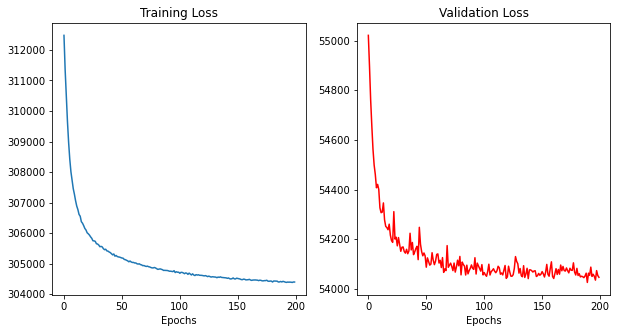

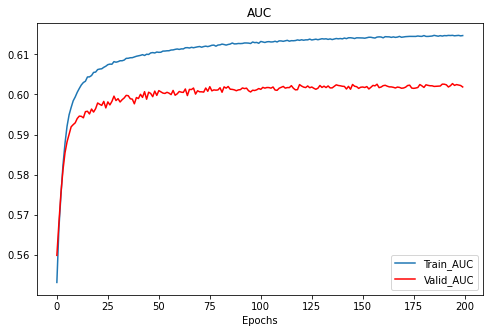

In [292]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
x = range(0, len(loss_list))
plt.plot(x, loss_list)
plt.title('Training Loss')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
x = range(0, len(loss_list))
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.plot(x, loss_valid_list, 'r')

plt.figure(figsize=[8,5])

x = range(0, len(valid_auc))
plt.plot(x, train_auc)
plt.title('AUC')
plt.xlabel('Epochs')
plt.plot(x, valid_auc, 'r')
plt.legend(['Train_AUC', 'Valid_AUC'])

#### Observación: El modelo esta haciendo underfitting. Probé agregando más neuronas y más capas y probé aumentando el nro de epochs y variando el learning rate para ver el impacto en el decrecimiento del error, pero nada modifica significativamente el resultado (ver gráficos en el archivo "Ej3 - Pruebas". Psoiblemente si el usuario va a gastar más o menos plata depende fuertemente de features como Product ID, y User UD, que los eliminé para este modelo sin embeddings. Ahora voy a probar con embeddings y eso debería cambiar los resultados.

### NNet con Embeddings

##### Enunciado: Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
##### Compare el score de cada modelo y comente lo necesario.

Columnas que voy a utilizar con Embedding:
* Product_ID
* User_ID

1) Mapeo a índices

In [152]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,purchase_label
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,...,0,0,0,0,0,0,1,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0,0,0,0,0,0,1,0,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,...,0,0,0,0,0,0,1,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0,0,0,0,0,0,1,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,...,0,0,0,0,0,0,0,0,1,0


In [153]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_enc,Age_0-17,Age_18-25,...,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,purchase_label
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.576434,13.596114,9263.968713,0.246895,0.027455,0.181178,...,0.072796,0.012039,0.015382,0.061014,0.135252,0.352358,0.185137,0.173224,0.154028,0.398491
std,1.727592e+03,6.522660,0.491770,3.936211,4.226025,2.352863,5023.065394,0.431205,0.163405,0.385166,...,0.259802,0.109058,0.123066,0.239357,0.341993,0.477705,0.388409,0.378441,0.360976,0.489588
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,14.000000,5823.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,14.000000,12054.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((467557, 38), (467557, 1), (82511, 38), (82511, 1))

In [155]:
product_id = df['Product_ID']
user_id = df['User_ID']


In [156]:
product_id.head()

0    P00069042
1    P00248942
2    P00087842
3    P00085442
4    P00285442
Name: Product_ID, dtype: object

In [157]:
user_id.head()

0    1000001
1    1000001
2    1000001
3    1000001
4    1000002
Name: User_ID, dtype: int64

In [158]:
unique_pid = np.unique(product_id)
index_pid = np.arange(0, len(unique_pid))
product_id_to_index = {key: value for key, value in zip(unique_pid, index_pid)}

In [159]:
unique_uid= np.unique(user_id)
index_uid = np.arange(0, len(unique_uid))
user_id_to_index = {key: value for key, value in zip(unique_uid, index_uid)}

In [160]:
len(product_id_to_index), len(user_id_to_index)

(3631, 5891)

In [161]:
pids_idx = np.array([product_id_to_index[product] for product in product_id])
uids_idx = np.array([user_id_to_index[user] for user in user_id])

Verifico que quedaron bien:

In [162]:
min(pids_idx), max(pids_idx), min(uids_idx), max(uids_idx)

(0, 3630, 0, 5890)

In [163]:
class CustomDatasetWithEmb(Dataset):

    def __init__(self, X, pids_idx, uids_idx, y):
        super().__init__()
        self.X = X
        self.pids_idx = pids_idx
        self.uids_idx = uids_idx
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.pids_idx[idx], self.uids_idx[idx], self.y[idx]

Training y Validation

In [164]:
pids_index_train = pids_idx[train_idx]
uids_index_train = uids_idx[train_idx]

pids_index_valid = pids_idx[valid_idx]
uids_index_valid = uids_idx[valid_idx]

#pids_index_test = pids_idx[test_idx]
#uids_index_test = uids_idx[test_idx]

In [165]:

train = CustomDatasetWithEmb(X_train, pids_index_train, uids_index_train, y_train)
valid = CustomDatasetWithEmb(X_valid, pids_index_valid, uids_index_valid, y_valid)

In [166]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(valid, batch_size=64, shuffle=True)

In [167]:
class NNetWithEmbeddings(torch.nn.Module):

    def __init__(self, number_of_products, dp, number_of_users, du):
        super().__init__()
        self.embedding_pid = torch.nn.Embedding(num_embeddings=number_of_products, embedding_dim=dp)
        self.embedding_uid = torch.nn.Embedding(num_embeddings=number_of_users, embedding_dim=du)
        self.linear_1 = torch.nn.Linear(in_features=(38+dp+du), out_features=100, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=100, out_features=50, bias=True)
        self.relu_3 = torch.nn.ReLU()
        self.linear_4 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        self.relu_4 = torch.nn.ReLU()
        self.linear_5 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        self.relu_5 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features=50, out_features=1, bias=True)

    def forward(self, x, pid_idx, uid_idx):
        pid_emb = self.embedding_pid(pid_idx) # (64, d)
        uid_emb = self.embedding_uid(uid_idx) # (64, d)

        final_input = torch.cat([x, pid_emb, uid_emb], dim=1) # (64, 13+d)

        x = self.linear_1(final_input) 
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.relu_2(x)
        x = self.linear_3(x) 
        x = self.relu_3(x) 
        x = self.linear_4(x)
        x = self.relu_4(x) 
        x = self.linear_5(x) 
        x = self.relu_5(x)    
        x = self.output(x) 
        return x

In [168]:
nnet2 = NNetWithEmbeddings(number_of_products=3631, dp=8, number_of_users=5891, du =8)
optimizer = torch.optim.Adam(nnet2.parameters(), lr=0.001)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

In [169]:
print(nnet2)

NNetWithEmbeddings(
  (embedding_pid): Embedding(3631, 8)
  (embedding_uid): Embedding(5891, 8)
  (linear_1): Linear(in_features=54, out_features=100, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=100, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=50, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=50, out_features=50, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=50, out_features=50, bias=True)
  (relu_5): ReLU()
  (output): Linear(in_features=50, out_features=1, bias=True)
)


In [170]:
n_epochs_nnet2 = 200

In [62]:
nnet = nnet2

nnet.to(device)

loss_list = []
train_auc = []
loss_valid_list = []
valid_auc = []

for epoch in range(n_epochs_nnet2):

    running_loss = 0
    running_y_score = []
    running_y_label = []
    running_valid_loss = 0
    running_y_score_v = []
    running_y_label_v = []


    #### TRAINING ####

    for i, data in enumerate(train_dataloader):

        # datos del batch
        X_batch, pid_idx_batch, uid_idx_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        pid_idx_batch = pid_idx_batch.to(device)
        uid_idx_batch = uid_idx_batch.to(device)
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet(X_batch, pid_idx_batch, uid_idx_batch)
        y_batch_hat = torch.sigmoid(y_batch_score).reshape(-1)

        # backpropagation
        loss = loss_function(y_batch_score, Y_batch) # calcula el loss
        loss.backward() # hacer los gradientes del loss

        # actualización de parametros
        optimizer.step() 

        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())  
        running_y_label += list(Y_batch.detach().cpu().numpy()) 

    # metrics training
    loss_list.append(running_loss)
    fpt, tpr, _ = metrics.roc_curve(running_y_label, running_y_score)
    auc = metrics.auc(fpt, tpr)
    train_auc.append(auc)
    

    #### VALIDATION ####
    nnet.eval()
    with torch.no_grad(): # Me aseguro de no calcular ningun gradiente, porque estoy haciendo evaluacion
      for i, data in enumerate(valid_dataloader):
        # datos del batch
        X_batch_v, pid_idx_batch_v, uid_idx_batch_v, y_batch_v = data 
        X_batch_v = X_batch_v.to(device).float()
        pid_idx_batch_v = pid_idx_batch_v.to(device)
        uid_idx_batch_v = uid_idx_batch_v.to(device)
        Y_batch_v = y_batch_v.to(device).float()

        y_batch_score_v = nnet(X_batch_v, pid_idx_batch_v, uid_idx_batch_v)
        y_batch_hat_v = torch.sigmoid(y_batch_score_v).reshape(-1)

        valid_loss = loss_function(y_batch_score_v, Y_batch_v) # calcula el loss

        running_valid_loss += valid_loss.item()
        running_y_score_v += list(y_batch_score_v.detach().cpu().numpy())  
        running_y_label_v += list(Y_batch_v.detach().cpu().numpy()) 

     
    # metrics validation
    loss_valid_list.append(running_valid_loss)
    fpt_v, tpr_v, _ = metrics.roc_curve(running_y_label_v, running_y_score_v)
    auc_v = metrics.auc(fpt_v, tpr_v)
    valid_auc.append(auc_v)
    print(f"Epoch {epoch} | Training loss: {running_loss} | AUC: {auc}")
    print(f"Epoch {epoch} | Validation loss: {running_valid_loss} | Validation AUC: {auc_v}")





Epoch 0 | Training loss: 173510.22707653046 | AUC: 0.8956292066309857
Epoch 0 | Validation loss: 16495.27544784546 | Validation AUC: 0.9401000008687856
Epoch 1 | Training loss: 125717.08252668381 | AUC: 0.9454470519065468
Epoch 1 | Validation loss: 15535.644131660461 | Validation AUC: 0.9467021013033241
Epoch 2 | Training loss: 118654.80163097382 | AUC: 0.9512316810315095
Epoch 2 | Validation loss: 15023.183418273926 | Validation AUC: 0.9502590577241458
Epoch 3 | Training loss: 114574.71246671677 | AUC: 0.954656968591679
Epoch 3 | Validation loss: 14855.2962808609 | Validation AUC: 0.951855353393236
Epoch 4 | Training loss: 111829.34311628342 | AUC: 0.9569336514343322
Epoch 4 | Validation loss: 14666.353744983673 | Validation AUC: 0.9527393000171763
Epoch 5 | Training loss: 109684.0070271492 | AUC: 0.9586605412543685
Epoch 5 | Validation loss: 14689.127831935883 | Validation AUC: 0.9527553590327557
Epoch 6 | Training loss: 107903.14261198044 | AUC: 0.9600542167018998
Epoch 6 | Validati

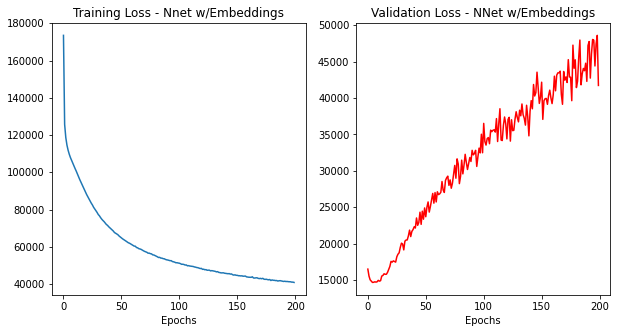

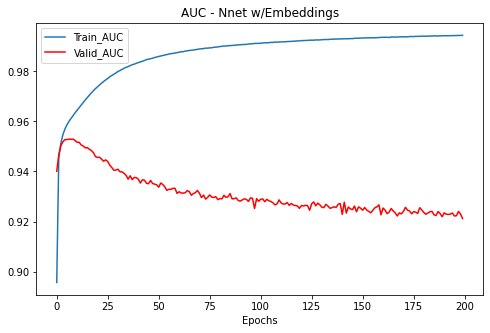

In [63]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
x = range(0, len(loss_list))
plt.plot(x, loss_list)
plt.title('Training Loss - Nnet w/Embeddings')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
x = range(0, len(loss_list))
plt.title('Validation Loss - NNet w/Embeddings')
plt.xlabel('Epochs')
plt.plot(x, loss_valid_list, 'r')

plt.figure(figsize=[8,5])

x = range(0, len(valid_auc))
plt.plot(x, train_auc)
plt.title('AUC - Nnet w/Embeddings')
plt.xlabel('Epochs')
plt.plot(x, valid_auc, 'r')
plt.legend(['Train_AUC', 'Valid_AUC'])

#### Después de agregados los embeddings, se observa un comportamiento compatible con overfitting, donde el error de training decrece (aunque no a cero) y el error de validación por el contrario aumenta. A continuación voy a hacer pruebas para tratar de mejorar el modelo:

#### Pruebo agregando regularización con Dropout

In [205]:
train_do = CustomDatasetWithEmb(X_train, pids_index_train, uids_index_train, y_train)
valid_do = CustomDatasetWithEmb(X_valid, pids_index_valid, uids_index_valid, y_valid)
train_dataloader_do = DataLoader(train, batch_size=64, shuffle=True)
valid_dataloader_do = DataLoader(valid, batch_size=64, shuffle=True)

In [206]:
class NNetWithEmbeddings_do(torch.nn.Module):

    def __init__(self, number_of_products, dp, number_of_users, du):
        super().__init__()
        self.embedding_pid = torch.nn.Embedding(num_embeddings=number_of_products, embedding_dim=dp)
        self.embedding_uid = torch.nn.Embedding(num_embeddings=number_of_users, embedding_dim=du)
        self.linear_1 = torch.nn.Linear(in_features=(38+dp+du), out_features=100, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
        self.dropout_2 = torch.nn.Dropout(p =0.5)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=100, out_features=50, bias=True)
        self.dropout_3 = torch.nn.Dropout(p =0.5)
        self.relu_3 = torch.nn.ReLU()
        self.linear_4 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        self.dropout_4 = torch.nn.Dropout(p =0.5)
        self.relu_4 = torch.nn.ReLU()
        self.linear_5 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        self.dropout_5 = torch.nn.Dropout(p =0.5)
        self.relu_5 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features=50, out_features=1, bias=True)

    def forward(self, x, pid_idx, uid_idx):
        pid_emb = self.embedding_pid(pid_idx) # (64, d)
        uid_emb = self.embedding_uid(uid_idx) # (64, d)

        final_input = torch.cat([x, pid_emb, uid_emb], dim=1) # (64, 13+d)

        x = self.linear_1(final_input) 
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.dropout_2(x)
        x = self.relu_2(x)
        x = self.linear_3(x) # x.shape -> 64 x 100
        x = self.dropout_3(x)
        x = self.relu_3(x) # x.shape -> 64 x 100
        x = self.linear_4(x) # x.shape -> 64 x 50
        x = self.dropout_4(x)
        x = self.relu_4(x) # x.shape -> 64 x 50
        x = self.linear_5(x) # x.shape -> 64 x 50
        x = self.dropout_5(x)
        x = self.relu_5(x) # x.shape -> 64 x 50       
        x = self.output(x) 
        return x

In [207]:
nnet3 = NNetWithEmbeddings_do(number_of_products=3631, dp=8, number_of_users=5891, du =8)
optimizer = torch.optim.Adam(nnet3.parameters(), lr=0.0001)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

In [208]:
print(nnet3)

NNetWithEmbeddings_do(
  (embedding_pid): Embedding(3631, 8)
  (embedding_uid): Embedding(5891, 8)
  (linear_1): Linear(in_features=54, out_features=100, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=100, out_features=100, bias=True)
  (dropout_2): Dropout(p=0.5, inplace=False)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=50, bias=True)
  (dropout_3): Dropout(p=0.5, inplace=False)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=50, out_features=50, bias=True)
  (dropout_4): Dropout(p=0.5, inplace=False)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=50, out_features=50, bias=True)
  (dropout_5): Dropout(p=0.5, inplace=False)
  (relu_5): ReLU()
  (output): Linear(in_features=50, out_features=1, bias=True)
)


In [209]:
n_epochs_nnet3 = 200

In [210]:

nnet3.to(device)

loss_list = []
train_auc = []
loss_valid_list = []
valid_auc = []

for epoch in range(n_epochs_nnet3):

    running_loss = 0
    running_y_score = []
    running_y_label = []
    running_valid_loss = 0
    running_y_score_v = []
    running_y_label_v = []


    #### TRAINING ####

    for i, data in enumerate(train_dataloader_do):

        # datos del batch
        X_batch, pid_idx_batch, uid_idx_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        pid_idx_batch = pid_idx_batch.to(device)
        uid_idx_batch = uid_idx_batch.to(device)
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet3(X_batch, pid_idx_batch, uid_idx_batch)
        y_batch_hat = torch.sigmoid(y_batch_score).reshape(-1)

        # backpropagation
        loss = loss_function(y_batch_score, Y_batch) # calcula el loss
        loss.backward() # hacer los gradientes del loss

        # actualización de parametros
        optimizer.step() 

        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())  
        running_y_label += list(Y_batch.detach().cpu().numpy()) 

    # metrics training
    loss_list.append(running_loss)
    fpt, tpr, _ = metrics.roc_curve(running_y_label, running_y_score)
    auc = metrics.auc(fpt, tpr)
    train_auc.append(auc)
    #print(f"Epoch {epoch} | Training loss: {running_loss} | AUC: {auc}")

    #### VALIDATION ####
    nnet.eval()
    with torch.no_grad(): # Me aseguro de no calcular ningun gradiente, porque estoy haciendo evaluacion
      for i, data in enumerate(valid_dataloader_do):
        # datos del batch
        X_batch_v, pid_idx_batch_v, uid_idx_batch_v, y_batch_v = data 
        X_batch_v = X_batch_v.to(device).float()
        pid_idx_batch_v = pid_idx_batch_v.to(device)
        uid_idx_batch_v = uid_idx_batch_v.to(device)
        Y_batch_v = y_batch_v.to(device).float()

        # TODO: pasos para acumular y_score and y
        y_batch_score_v = nnet3(X_batch_v, pid_idx_batch_v, uid_idx_batch_v)
        y_batch_hat_v = torch.sigmoid(y_batch_score_v).reshape(-1)

        valid_loss = loss_function(y_batch_score_v, Y_batch_v) # calcula el loss

        running_valid_loss += valid_loss.item()
        running_y_score_v += list(y_batch_score_v.detach().cpu().numpy())  
        running_y_label_v += list(Y_batch_v.detach().cpu().numpy()) 

     
    # metrics validation
    loss_valid_list.append(running_valid_loss)
    fpt_v, tpr_v, _ = metrics.roc_curve(running_y_label_v, running_y_score_v)
    auc_v = metrics.auc(fpt_v, tpr_v)
    valid_auc.append(auc_v)
    print(f"Epoch {epoch} | Training loss: {running_loss} | AUC: {auc}")
    print(f"Epoch {epoch} | Validation loss: {running_valid_loss} | Validation AUC: {auc_v}")





Epoch 0 | Training loss: 305795.1854362488 | AUC: 0.614413222171511
Epoch 0 | Validation loss: 51146.46091175079 | Validation AUC: 0.6902261022537065
Epoch 1 | Training loss: 271413.7283592224 | AUC: 0.7455088139877049
Epoch 1 | Validation loss: 44619.00245285034 | Validation AUC: 0.7878305597357254
Epoch 2 | Training loss: 234759.51041793823 | AUC: 0.8240844974272117
Epoch 2 | Validation loss: 38630.39183330536 | Validation AUC: 0.8503502574184351
Epoch 3 | Training loss: 205219.44019794464 | AUC: 0.8712304518279412
Epoch 3 | Validation loss: 34346.51896858215 | Validation AUC: 0.8848777323951127
Epoch 4 | Training loss: 184431.61306476593 | AUC: 0.8978278691192284
Epoch 4 | Validation loss: 31382.000690460205 | Validation AUC: 0.9050618901740493
Epoch 5 | Training loss: 170070.8363184929 | AUC: 0.9136450302185214
Epoch 5 | Validation loss: 29343.47686958313 | Validation AUC: 0.9176532261747453
Epoch 6 | Training loss: 160120.77906131744 | AUC: 0.9234260188413944
Epoch 6 | Validation 

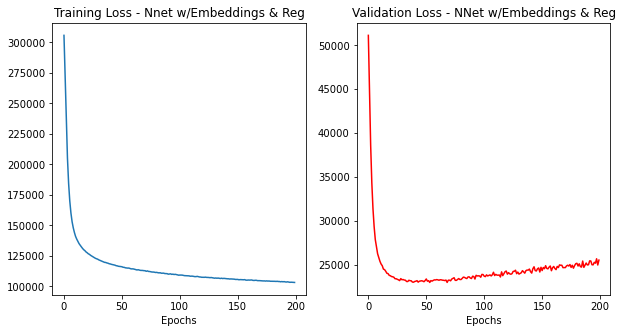

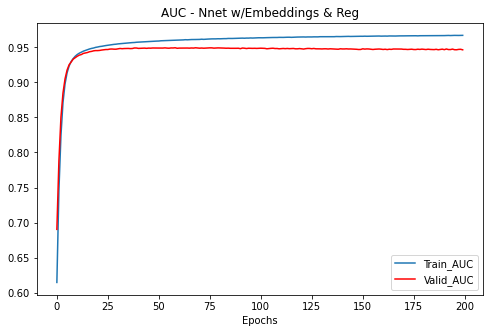

In [211]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
x = range(0, len(loss_list))
plt.plot(x, loss_list)
plt.title('Training Loss - Nnet w/Embeddings & Reg')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
x = range(0, len(loss_list))
plt.title('Validation Loss - NNet w/Embeddings & Reg')
plt.xlabel('Epochs')
plt.plot(x, loss_valid_list, 'r')

plt.figure(figsize=[8,5])

x = range(0, len(valid_auc))
plt.plot(x, train_auc)
plt.title('AUC - Nnet w/Embeddings & Reg')
plt.xlabel('Epochs')
plt.plot(x, valid_auc, 'r')
plt.legend(['Train_AUC', 'Valid_AUC'])

#### Las capas de dropout (y ajuste del learning rate) parecen haber corregido en parte el efecto de overfitting que apareció después de agregar los embeddings, sin embargo el loss de validación presenta tendencia levemente creciente con lo cual habría que seguir ajustando los parámetros. 
#### Se podría probar con una red más grande y por otro lado quizás hacer un análisis más exhaustivo de los datos (por ejemplo analizar si las clases podrían estar desbalanceadas) ya que el realizado en este ejercicio fue muy básico.